In [ ]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

In [ ]:
%autosave 0
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd

# Estadística

La estadística busca:

> Describir fenómenos complejos a partir de observaciones parciales 

> Inferir propiedades de una población o sistema basándonos en una muestra

> Usar datos para responder preguntas y tomar decisiones

El trabajo estadístico se puede resumir en el siguiente ciclo

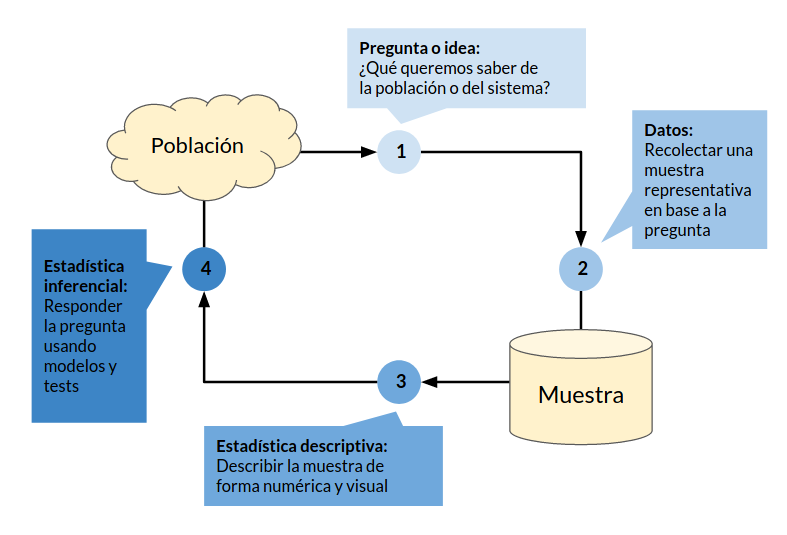


En esta serie de lecciones estudiaremos técnicas de estadística descriptiva e inferencial (pasos 3 y 4)

Para un tratamiento más completo y profundo recomiendo el siguiente curso online: https://online.stat.psu.edu/stat100/

# Estadística descriptiva

Sea una muestra de datos

Antes de responder preguntas con los datos debemos entenderlos

> Para entender la muestra podemos intentar describirla

Por ejemplo
- ¿Son mis datos discretos o continuos? ¿Cuál es su rango?
- ¿Cuál es el valor medio de mis datos? ¿Cuál es su disperción?
- ¿Tiene una moda o múltiples modas?
- ¿Existen datos extremos (*outliers*)?

Todas estas preguntas están relacionadas a la **distribución** de los datos. Repasemos este concepto


## Distribución de probabilidades

Una distribución de probabilidad es una función que relaciona los valores posibles de una VA con sus respectivas probabilidades de ocurrir

La definición es un poco distinta dependiendo si la variable aleatoria es discreta o continua

- Variable continua: Toma valores de un conjunto no numerable. Ejemplos: Los números reales
- Variable discreta o categórica: Toma valores de un conjunto numerable. Puede ser ordinal, por ejemplo los números enteros. Puede ser nominal, por ejemplo el género o la étnia de las personas

Ambas pueden estar definidas en un cierto rango

### Función de masa de probabilidad

Si nuestra variable $x\sim X$ es discreta entonces podemos **calcular la probabilidad de un evento** como

$$
P(X = x) = p_X(x)
$$

donde $p_X(x)$ se conoce como función de masa de probabilidad (fmp)

Para que una fmp sea valida se debe cumplir

- Estar en el rango de una probabilidad: $p_X(x) \in [0, 1]$
- Sumar a 1 en el dominio completo: $\sum_{x\in\mathcal{X}} p_X(x) = 1$    

### Función de densidad de probabilidad

Si nuestra variable $x\sim X$ es continua entonces **debemos definir un rango si queremos estimar su probabilidad**

$$
P(a < X < b) = \int_{a}^{b} f_X(x) \,dx = F_X(b) - F_X(a)
$$

donde $f_X(\cdot)$ es la función de densidad de probabilidad (fdp) y $F_X(\cdot)$ es la función de densidad acumulada

Para que una fdp sea valida se debe cumplir
- No-negatividad: $f_X(x) \geq 0$
- Integrar a 1 en el dominio completo: $\int_{x\in\mathcal{X}} f_X(x) \,dx = 1$ 
  
  
### Probabilidad conjunta, marginal y condicional

Las definiciones anteriores son para fdp/fmp de una variable

Si queremos calcular la probabilidad de que $X=x$ y $Y=y$ entonces necesitamos la distribución conjunta $P(X, Y)$ 

A partir de la conjunta se pueden obtener la probabilidad marginal de $X$ (o de $Y$)

$$
P(X=x) = \sum_{y \in \mathcal{Y}} P(X=x, Y=y) 
$$

que corresponde a sumar (marginalizar) la variable que no nos interesa

Usando la conjunta y las marginales podemos obtener **las probabilidades condicionales**

$$
P(Y=y|X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
$$

ssi $P(X=x) \neq 0$

De esta forma podemos relacionar variables estilo causa y efecto

### Distribución acumulada empírica

En general no sabemos a priori la fdp/fmp de los datos 

Podemos calcular probabilidades usando la distribución empírica

Si tengo $n$ datos $X_1, X_2, \ldots, X_n$, su **distribución acumulada empírica** es

$$
F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(X_i < x)
$$

Donde la función indicadora $\mathbb{1}(X_i<x)$ es igual a $1$ si la $X_i<x$ o $0$ en el caso contrario

Si los datos están ordenados entonces sólo tenemos que buscar en que posición se encuentra $x$ y dividir por $n$

Podemos implementarla en NumPy como

```python
def ECDF(data):
    data = np.sort(data)
    n = len(data)
    def result(x):
        return np.searchsorted(data, x, side='right')/n
    return result
```

Luego si tengo una arreglo de datos $a$ y quiero saber la probabilidad de $b$ 
```python
>>> ECDF(a)(b)
```

### Ejercicio 

En esta lección usaremos la base de datos [**Diagnóstico de cancer de mama** de la Universidad de Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

- La base de datos incluye un identificador de paciente y un diagnóstico hecho por un médico 
- El diagnóstico puede ser M: tumor maligno o B: tumor benigno
- Cada paciente tiene asociado tres muestras de nucleos celulares y cada muestra está descrita por 10 atributos

Trabajaremos con el **radio** y la **textura** de la primera muestra

In [ ]:
df = pd.read_csv('../data/cancer.csv', index_col=0)
df = df[["diagnosis", "radius1", "texture1"]]
display(df.head())

Usando estos datos, conteste

1. ¿De que tipo son las columnas *diagnosis*, *radius1* y *texture1*? ¿Cuál es el rango de cada uno?
1. Grafique la distribución acumulada empírica del radio dado que el tumor es benigno. Repita para el caso maligno
1. Estime la probabilidad de que el radio sea menor a 15 dado que es el tumor es benigno. Repita para el caso maligno
1. Estime la probabilidad de que la textura sea mayor que 10 y menor que 20 dado que el tumor es benigno. Repita para el caso maligno
1. Estime la probabilidad de que el radio sea menor a 15 y que la textura esté entre 10 y 20 dado que el tumor es maligno. Repita para el caso maligno

In [ ]:
# Completa aquí


In [ ]:
YouTubeVideo_formato('ihcip87q4E8')

### Histograma

El histograma es una método que nos permite **estimar la densidad o masa de probabilidad de una variable**

La construcción de un histograma de densidad tiene dos pasos

1. Definir un conjunto de **intervalos/cajas/bines** para la variable de interés
1. Contar cuantos elementos de la muestra corresponden a cada intervalo y dividir por el total

Esto se visualiza usando un gráfico de barra

Estudiaremos el caso más simple donde los bines son 
- Disjuntos: El término de un bin es el comienzo del siguiente
- Del mismo tamaño: Todos los bines tienen el mismo ancho

En este caso los intervalos se construyen especificando el 
- rango del histograma: Comienzo del primer bin y termino del último bin
- cantidad de bines: En conjunto con el rango especifican el tamaño de los bines



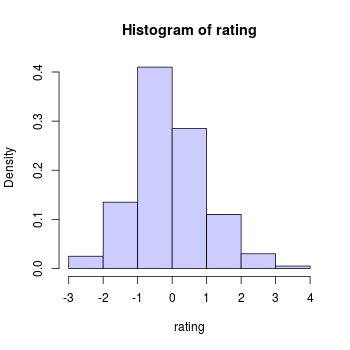

> En este ejemplo la cantidad de bines es $7$ y el rango es $[-3, 4]$, por ende el tamaño de los bines es $1$

El tamaño de los bines es un parametro sensible

> El tamaño de los bines controla la resolución del histograma. Si usamos bines muy grandes perdemos detalle. Si son muy pequeños el histograma será muy ruidoso.

El histograma revela visualmente algunas propiedades y comportamientos de la muestra

Por ejemplo

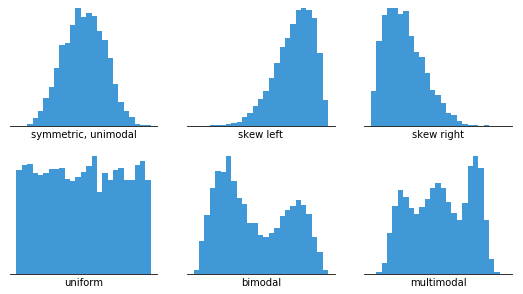


- Cantidad de modas: Una, dos,  múltiples o ninguna (uniforme)
- Distribución simétrica o asimétrica. En el segundo caso el peso puede estar hacia la cola izquierda o derecha


### Construyendo histogramas de una y dos variables

Podemos visualizar un histograma con matplotlib usando

```python
plt.hist(x, # datos
         bins=None, # Cantidad de cajas (escalar) o bordes de las cajas (secuencia creciente)
         range=None,  # Valor mínimo y máximo del histograma
         density=False, #dividir por len(x) o no
         ...
        )
```

También podemos usar [`seaborn.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Para el caso de dos variables se puede hacer un histograma bidimensional (mapa de contornos) con 

```python
plt.hist2d(x, # data eje horizontal
           y, # data eje vertical
           bins=10, # Igual que hist
           range=None, # Arreglo [[xmin, xmax],[ymin,ymax]]
           density=False, #Igual que hist
           ...
          )
```

También podemos usar [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

### Ejercicio

Muestre tres gráficos con los histogramas de las siguientes variables

- El radio (1D) para los diagnósticos M y B
- La textura (1D) para los diagnósticos M y B
- El radio y la textura (2D) para los diagnósticos M
- El radio y la textura (2D) para los diagnósticos B

Use el mismo rango y cantidad de bines para M y B. Explore la influencia de la cantidad de bines.

Compare las distribuciones de los casos M y B analizando sus semejanzas y diferencias

In [ ]:
# Completa tu solución aquí


In [ ]:
YouTubeVideo_formato('DOHp8xFDQNg')

## Descriptores de la distribución

Visualizar la distribución nos da mucha información 

En algunos casos sólo interesan ciertas características o atributos de la distribución

Podemos resumir una distribución en función de sus **momentos**

Cada momento describe una propiedad en particular

- Primer momento o media: Describe donde está localizada la distribución
- Segundo momento o varianza: Describe el ancho o dispersión de la distribución
- Tercer momento o simetría (skewness): Indica si la distribución es más pesada hacia la izquierda o hacia la derecha
- Cuarto momento o curtosis (kurtosis): Indica si la distribución es picuda o plana

<img src="https://images.deepai.org/django-summernote/2019-07-02/4d0a6ff1-8b53-4537-9d0a-919993d10024.png" width="500">

También podemos describir una distribución en función de la
- Moda: Valor más repetido
- Mediana: Valor central
- Diferencias entre percentiles

### Calculando descriptores

Podemos obtener la media y la desviación estándar de un dataframe usando 

```python
>>> df.describe()
```

Podemos obtener los primeros cuatro momentos de un ndarray

```python
>>> scipy.stats.describe(x)
```

Podemos calcular un momento de cualquier orden con

```python
>>> scipy.stats.moment(x, moment=5)
```

Otros descriptores comunes están implementados en [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)

### Ejemplo

Descriptores para el radio y la textura usando pandas y scipy

In [ ]:
# Descriptores

display(df.describe())

display(scipy.stats.describe(df[["radius1", "texture1"]]))

# Distribuciones comunes

Existen muchísimas distribuciones de probabilidad asociadas a distintos fenómenos y experimentos

La siguiente es una tabla de distribuciones comunes


| Distribución | Fenomeno que representa | Ejemplo |
| --- | --- | --- |
| **Bernoulli** | Evento binario  | Lanzamiento de una moneda |
| **Binomial** | Multiples eventos binarios independientes | |
| **Categórica** | Evento con $k$ valores posibles | Lanzamiento de un dado, Ruleta |
| **Poisson** | Conteo de eventos ocurridos en un período de tiempo | Cantidad de alumnos que llegan entre 9:50 y 10:00| 
| **Exponencial** | Valor continuo positivo | Tiempo de espera entre eventos|
| **Gamma** | Valor continuo positivo | Tiempos de espera hasta que ocurren $n$ eventos|
| **Beta** | Valor continuo en $[0, 1]$ |  Tiempo para completar una tarea, proporciones|
| **Normal/Gaussiana** | Valor continuo ubicado en la vecindad de un valor central| [Demasiados](https://galtonboard.com/probabilityexamplesinlife)|
| **Uniforme** | Valor discreto/continuo acotado a un rango, todos con igual probabilidad de ocurrencia| |

Conocer su forma nos permite reconocerlas cuando estudiamos la densidad empírica de nuestros datos


> Recomiendo el [zoológico de distribuciones](https://ben18785.shinyapps.io/distribution-zoo/) para ver interactivametne la forma de estas distribuciones

En la próxima lección veremos en mayor detalle como podemos ajustar una distribución teórica a nuestros datos



## Distribuciones teóricas con NumPy y SciPy

Podemos usar `np.random` para generar números aleatorios con distintas propiedades
- `randn` : Números reales con distribución normal estándar
- `rand`: Números reales con distribución uniforme en $[0, 1]$
- `randint(low=1, high=10)`: Números enteros con distribución uniforme entre $[0, 10]$

Podemos usar `scipy.stats` para generar datos de una distribución específica
- [continua](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
- [multivariada](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions)
- [discreta](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)

Las distribuciones tienen un constructor específico y métodos
- `pdf`/`pmf(x)` Retorna la distribución de probabilidad evaluada en $x$
- `cdf(x)` Distribución acumulada evaluada en $x$
- `ppf(p)` Inverso de la distribución acumulada
- `rvs(size=100)` Retorna $100$ muestras a partir de la distribución

## ¿Por qué la distribución Gaussiana para ser tan común?



<img src="https://thumbs.gfycat.com/AggressiveAromaticBuckeyebutterfly-size_restricted.gif">

Recordemos lo siguiente

> **Ley de los grandes números**

Sean $X_1, X_2, \ldots, X_N$ V.A independientes e idénticamente distribuidas (iid) con media $\mu$  

Se cumple que su promedio

$$
\bar X = \frac{1}{N} (X_1 + X_2 + \ldots + X_N)
$$

tiende a $\mu$ cuando $N \to \infty$

>  **Teorema central del límite**

Si $X_1, X_2, \ldots, X_N$ son V.A iid, entonces su promedio de distribuye como

$$
\bar X \sim \mathcal{N}(\mu, \sigma^2/N)
$$

Es decir que

> El promedio (suma) **se distribuye normal sin importar la distribución original** de las V.A. (pero tienen que ser independientes)

## Ejercicio

Sea una variable aleatoria que corresponde al lanzamiento de $n$ dados de seis caras

Lance los $n$ dados 1000 veces y muestre con un histograma la distribución del promedio de los $n$ dados

Repita para n: 1, 2, ..., 15 

¿Qué puede decir de la distribución que observa?

Hint: Puede usar `scipy.stats.multinomial` para modelar el resultado de lanzar $n$ dados

In [ ]:
### Completa tu solución aquí


In [ ]:
YouTubeVideo_formato('2QwMBZAlvc4')